In [2]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)
library(writexl)

Warning message:
"package 'randomForest' was built under R version 4.0.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine()  masks randomForest::combine()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks s

# Classification

In [3]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.explore =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/dfsimple.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.explore$clusters <- as.factor(df.cluster$clusters)
head(df.wb)



Country,cgdp,tpop,upop,popd,land,lita,lity,mori,rifr,cotw,moru,ppfg,prec
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5,1299.0269,NA,13.9,0.70,327
Albania,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5,9361.5460,59.95146,0.2,1.36,1485
Angola,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7,4963.6533,43.98964,48.8,0.97,1010
Armenia,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4,2329.1833,27.77778,0.2,0.77,562
Azerbaijan,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6,823.5207,24.48847,1.1,0.56,447
Bangladesh,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3,657.6039,14.19624,11.9,1.12,2666


Matching country from world bank and data frame df.explore

matching other exploatory data into the the data frame

In [4]:
df.exp <- merge(x = df.explore,
              y = df.wb,
              by = c("Country"))


df.exp <- df.exp[, c(1:8,11:19) ]
head(df.exp)
summary(df.exp)
write_xlsx(df.exp , '../../results/df-exp.xlsx')

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,upop,popd,land,lita,lity,mori,rifr,cotw,moru
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,25.495,56.93776,652860,43.01972,0.75933,62.5,1299.0269,NA,13.9
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,60.319,104.61226,27400,98.14115,1.00582,9.5,9361.5460,59.95146,0.2
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,65.514,24.71305,1246700,0.00000,0.00000,77.7,4963.6533,43.98964,48.8
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,2,63.149,103.68022,28470,0.00000,0.00000,12.4,2329.1833,27.77778,0.2
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,3,55.680,120.23432,82670,0.00000,0.00000,21.6,823.5207,24.48847,1.1
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,1,36.632,1239.57931,130170,73.91220,1.03276,32.3,657.6039,14.19624,11.9


   Country               bicy            cart             mcyc      
 Length:73          Min.   : 0.00   Min.   : 0.000   Min.   : 0.00  
 Class :character   1st Qu.: 9.50   1st Qu.: 0.100   1st Qu.: 2.60  
 Mode  :character   Median :20.70   Median : 1.300   Median : 9.60  
                    Mean   :23.14   Mean   : 4.732   Mean   :16.84  
                    3rd Qu.:33.50   3rd Qu.: 4.200   3rd Qu.:21.40  
                    Max.   :82.00   Max.   :41.500   Max.   :78.70  
                                                                    
      pcar            boat             wigc        clusters      upop      
 Min.   : 0.80   Min.   :0.0000   Min.   :0.0000   1:40     Min.   : 0.00  
 1st Qu.: 4.10   1st Qu.:0.0000   1st Qu.:0.1000   2:11     1st Qu.:29.36  
 Median : 8.90   Median :0.3000   Median :0.2000   3:14     Median :42.63  
 Mean   :12.21   Mean   :0.5712   Mean   :0.2123   4: 8     Mean   :44.43  
 3rd Qu.:17.10   3rd Qu.:0.6000   3rd Qu.:0.3000            3rd Qu.:

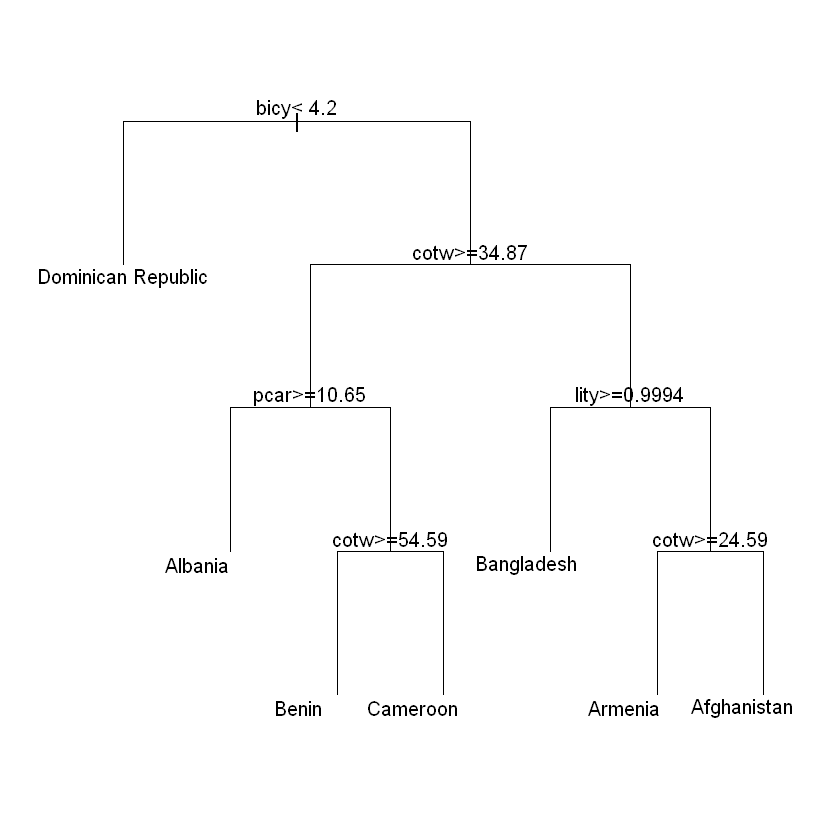

In [5]:
model <- rpart(Country ~., data = df.exp)
par(xpd = NA) # otherwise on some devices the text is clipped
plot(model)
text(model, digits = 3)

The different rules in tree can be printed as follow:

In [6]:
print(model, digits = 2)

n= 73 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 73 72 Afghanistan (0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.014)  
   2) bicy< 4.2 8  7 Dominican Republic (0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.12 0 0 0 0.12 0.12 0 0 0 0 0 0 0 0 0 0.12 0 0 0.12 0.12 0 0 0 0 0.12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.12 0 0 0 0 0 0 0) *
   3) bicy>=4.2 65 64 Afghanistan (0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0 0.015 0.015 0.015 0 0 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0 0.015 0.015 0 0 0.

These rules are produced by repeatedly splitting the predictor variables, starting with the variable that has the highest association with the response variable. The process continues until some predetermined stopping criteria are met.

# Example of data set

In [7]:
# Inspect the data
sample_n(df.exp, 3)
# Split the data into training and test set
set.seed(123)
training.samples <- df.exp$clusters %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- df.exp[training.samples, ]
test.data <- df.exp[-training.samples, ]




Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,upop,popd,land,lita,lity,mori,rifr,cotw,moru
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Timor-Leste,14.6,0.8,31.8,4.9,0.6,0.2,3,30.578,85.27048,14870,68.06683,1.02590,45.6,6607.623,NA,9.9
Madagascar,17.6,8.6,4.7,1.4,0.4,0.2,1,37.191,45.13986,581800,74.80432,0.98725,52.3,13179.229,NA,30.2
Vietnam,77.4,4.2,55.9,1.0,5.9,0.0,3,35.919,308.12525,310070,95.00038,0.99891,20.4,3799.289,22.28037,1.6


Fully grown trees
Here, we’ll create a fully grown tree showing all predictor variables in the data set.


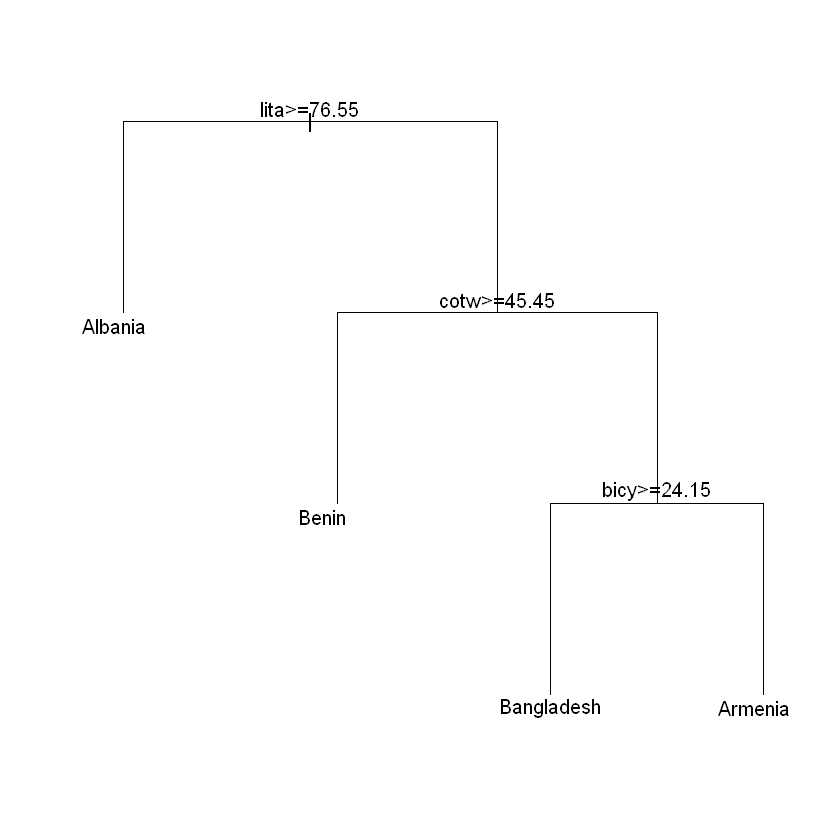

In [8]:
# Build the model
set.seed(123)
model1 <- rpart(Country ~., data = train.data, method = "class")
# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
plot(model1)
text(model1, digits = 3)

In [9]:
# Make predictions on the test data
predicted.classes <- model1 %>% 
  predict(test.data, type = "class")
head(predicted.classes)

1          3         10         20         24         26 
Bangladesh    Armenia      Benin    Armenia    Albania    Albania 
60 Levels: Albania Armenia Azerbaijan Bangladesh Benin Bolivia ... Zimbabwe

In [10]:
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Zero is not good, something went wrong, ask the professor for help potentially. 

[1] 0

# Pruning the tree

In [11]:
# Fit the model on the training set
set.seed(123)
model2 <- train(
  clusters ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model accuracy vs different values of
# cp (complexity parameter)
plot(model2)

ERROR: Error in na.fail.default(structure(list(clusters = structure(c(2L, 2L, : missing values in object


RMSE is computed as RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

In [12]:
# Print the best tuning parameter cp that
# maximizes the model accuracy
model2$bestTune

ERROR: Error in eval(expr, envir, enclos): object 'model2' not found


In [ ]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [ ]:
# Decision rules in the model
model2$finalModel

# Make predictions on the test data
predicted.classes <- model2 %>% predict(test.data)
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Must understand what these function of codes actually implment. 

# Create the regression tree

In [ ]:
# Fit the model on the training set
set.seed(123)
model <- train(
  bicy ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model error vs different values of
# cp (complexity parameter)
plot(model)
# Print the best tuning parameter cp that
# minimize the model RMSE
model$bestTune

Here, the best cp value is the one that minimize the prediction error RMSE (root mean squared error).

In [ ]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model$finalModel)
text(model$finalModel, digits = 3)

# Decision rules in the model
model$finalModel
# Make predictions on the test data
predictions <- model %>% predict(test.data)
head(predictions)
# Compute the prediction error RMSE
RMSE(predictions, test.data$Country)

# Conditionnal inference tree

In [ ]:
set.seed(123)
model <- train(
  bicy ~., data = train.data, method = "ctree2",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(maxdepth = 3, mincriterion = 0.95 )
  )
plot(model$finalModel)

Reference: http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/

# Fitting Classification Trees

Reference: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf (338)
https://www.datacamp.com/community/tutorials/decision-trees-R
Random Forest:
https://cran.r-project.org/web/packages/randomForest/randomForest.pdf

In [ ]:
names(df.exp)

In [ ]:
hist(df.exp$cart)
hist(df.exp$clusters)

In [ ]:
#High = ifelse(df$acar <= 10 , "No", "Yes")
#df = data.frame(df, High)

In [ ]:
tree.wa = tree(clusters ~ . - Country  , data = df.exp)
head(df.exp)
# We must figure out the NAs introduced by coercion meaning before preceeding this sections

In [ ]:
summary(tree.wa)

In [ ]:
plot(tree.wa)
text(tree.wa, pretty = 0)

In [ ]:
tree.wa

Training Session

In [ ]:
set.seed(101)
train=sample(1:nrow(df.exp), 59)

In [ ]:
tree.wa = tree(clusters ~ . - Country  , data = df.exp)
plot(tree.wa)
text(tree.wa, pretty=0)

tree.pred = predict(tree.wa, df.exp[-train,], type="class")

Finally, we use the data.frame() function to merge High with the rest of
the borehole (bore) data.

set.seed(2)
train=sample(1:nrow(df.exp), 78)
df.test= df.exp[-train,]
High.test= df.exp$clusters[-train]
tree.df =tree(clusters ~ . - Country ,df.exp,subset=train)
summary(tree.df)
tree.pred=predict(tree.df,df.test,type="class")
table(tree.pred,High.test)
plot(tree.df)
# Unsure what trees cannot handle multiple responses mean

# Random Forest

To prepare data for random forest, let's set the seed and create a sample training set of 300 observations.

In [ ]:
set.seed(101)
train = sample(1:nrow(df.exp), 73)
head(train)

In [ ]:
rf.water = randomForest(cart~., data = df.exp, subset = train)
rf.water

In [ ]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(cart~., data = df.exp, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, df.exp[-train,])
  test.err[mtry] = with(df.exp[-train,], mean( (cart-pred)^2 ))
}

In [ ]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", "blue"), type = "b", ylab="Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 23, col = c("red", "blue"))

Printing out the random forest gives its summary: the # of trees (500 were grown), the mean squared residuals (MSR), and the percentage of variance explained. The MSR and % variance explained are based on the out-of-bag estimates, a very clever device in random forests to get honest error estimates.